# 보험료 예측

## 1. 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
insurance = pd.read_csv('./data/Medical_insurance.csv')

In [3]:
insurance.head() # column명 변환 불필요

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- age : 나이
- sex : 성별
- bmi : bmi 지수
- children : 자녀의 수
- smoker : 흡연 여부
- region : 거주 지역
- charges : 보험료 -> Y

## 2. 데이터 전처리

In [4]:
insurance.shape

(2772, 7)

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


### 2-1. 결측치 제거

In [6]:
insurance.isnull().sum() # 결측치 없음

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 2-2. 이상치 탐지

In [7]:
insurance.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
%matplotlib inline

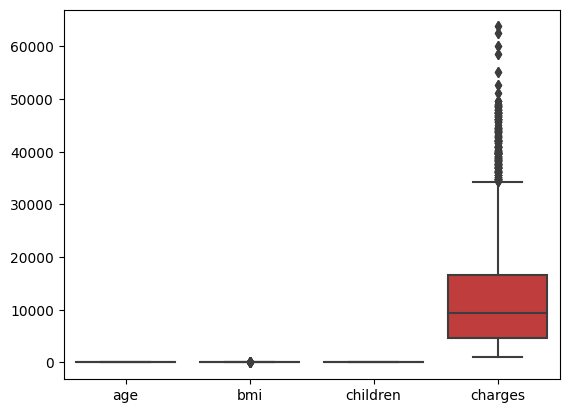

In [9]:
bplot = sns.boxplot(data=insurance)

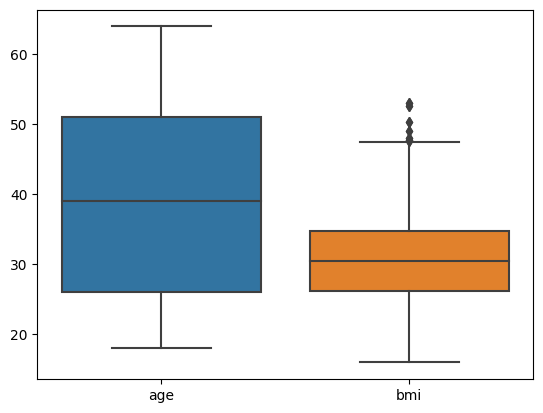

In [10]:
# charges의 값이 너무 커서 나머지 값들이 제대로 보이지 않으므로 하나하나 그려보자
bplot = sns.boxplot(data=insurance[['age', 'bmi']])

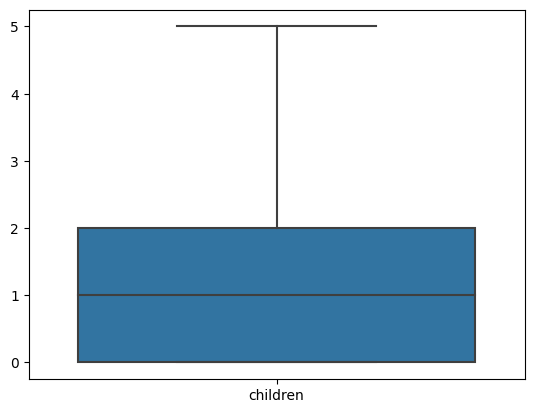

In [11]:
bplot= sns.boxplot(data= insurance[['children']])

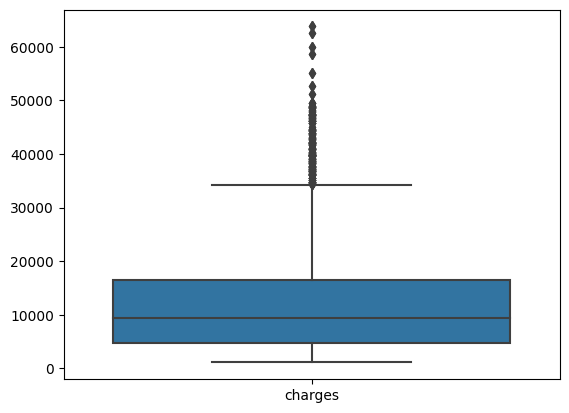

In [12]:
bplot= sns.boxplot(data= insurance[['charges']])

#### 결론 : charges와 bmi에 이상치 값들이 있는 것을 확인
- 기본 : x < Q1 - IQR or X > Q3 + IQR 값들을 제거
- 데이터에 따라 이상치가 필요하다고 판단하여 제거하지 않는 경우도 있음
    - 보험의 경우 이상치가 있는 데이터가 필요하기에 이상치를 제거하지 않고 로그변환을 통해 일정부분 해결 가능

## 3. 탐색적 자료분석(EDA)

In [13]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### 3-1. 범주형

Text(0.5, 1.0, 'sex')

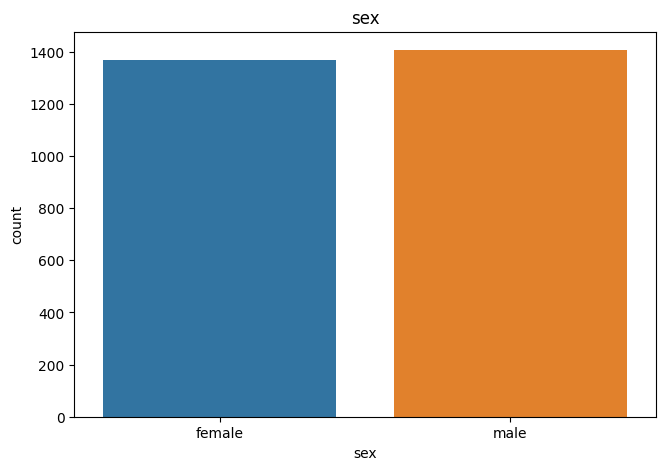

In [14]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'sex', data = insurance)
plt.title('sex')

Text(0.5, 1.0, 'children')

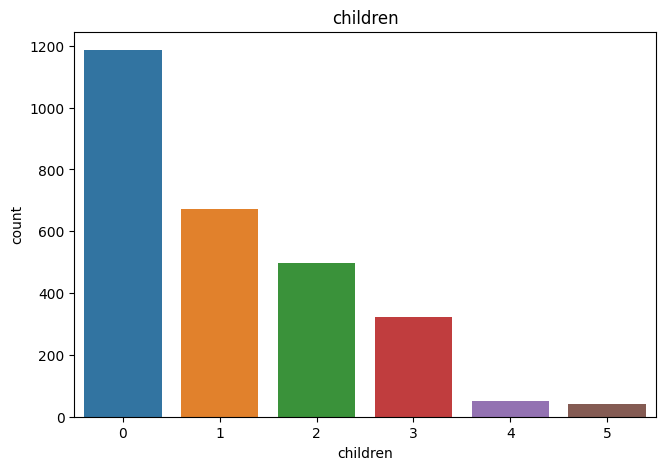

In [15]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'children', data = insurance)
plt.title('children')

Text(0.5, 1.0, 'smoker')

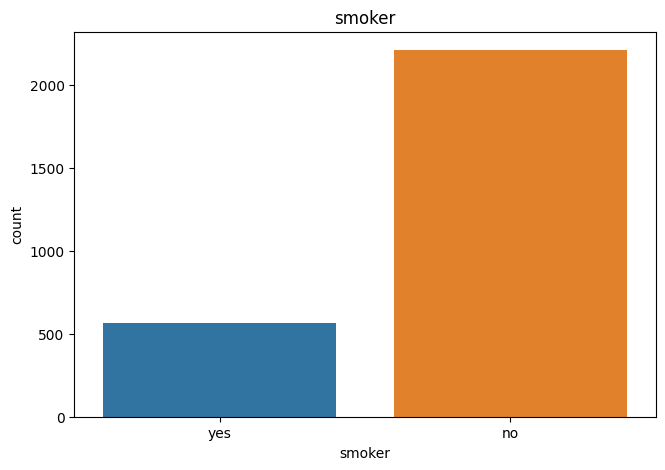

In [16]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'smoker', data = insurance)
plt.title('smoker')

Text(0.5, 1.0, 'region')

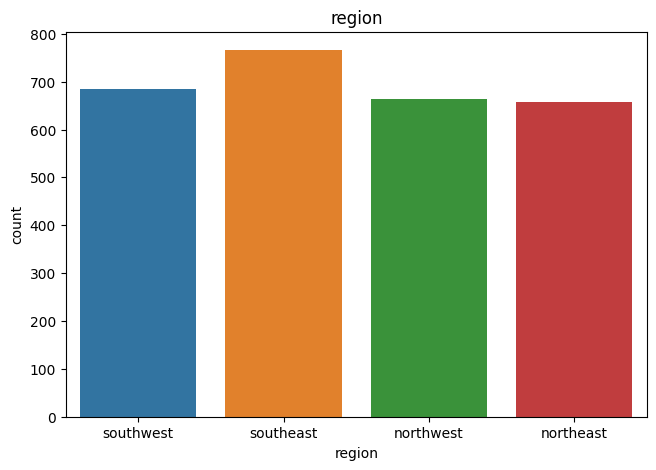

In [17]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'region', data = insurance)
plt.title('region')

### 3-2. 범주형 변수와 y와의 관계
- barplot 사용 : 막대의 높이는 y의 평균, 검정색 실선은 y의 분포

<Axes: xlabel='sex', ylabel='charges'>

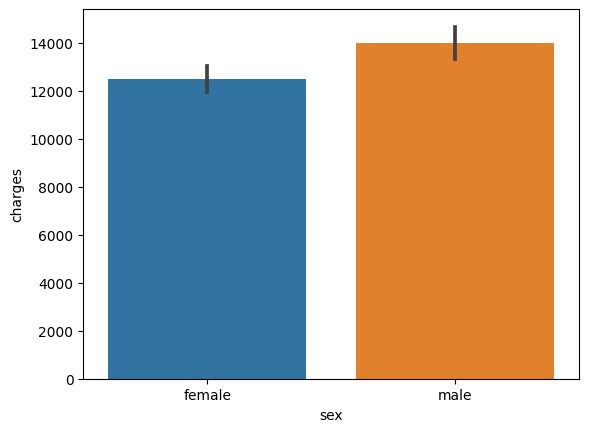

In [18]:
# 평균적으로 남성일수록 보험료가 비싸다
sns.barplot(x='sex', y='charges', data=insurance)

<Axes: xlabel='children', ylabel='charges'>

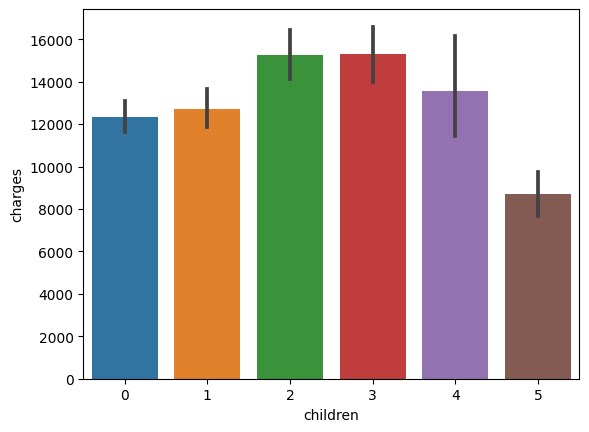

In [19]:
# 자녀에 따른 보험료의 차이는 미비하나 2~3명일 경우 보험료가 가장 비싸다
sns.barplot(x='children', y='charges', data=insurance)

In [20]:
# Q. 5명일 때 특히 보험료가 작게 나온다 -> 이는 데이터 자체가 작아서이다.
insurance['children'].value_counts()

0    1186
1     672
2     496
3     324
4      52
5      42
Name: children, dtype: int64

<Axes: xlabel='smoker', ylabel='charges'>

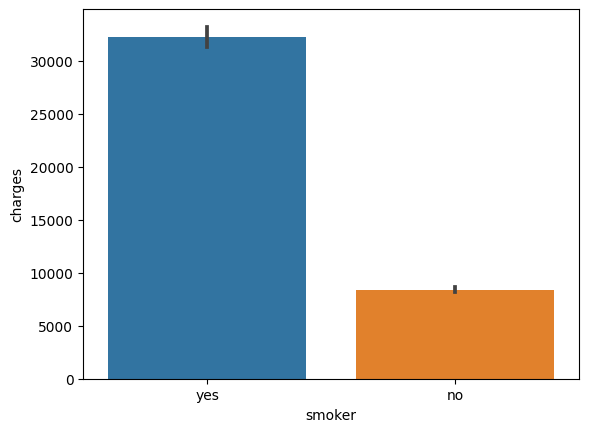

In [21]:
# 담배를 필경우 피지 않을 경우보다 보험료가 3배 이상 비싸다 => 주요 변수
sns.barplot(x='smoker', y='charges', data=insurance)

<Axes: xlabel='region', ylabel='charges'>

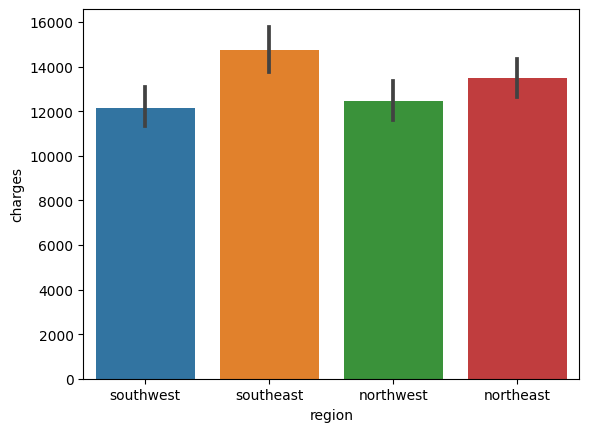

In [22]:
# region에 의한 차이는 미비하다 남동쪽이 다른 지역에 비해 보험료가 약간 비싸다
sns.barplot(x='region', y='charges', data=insurance)

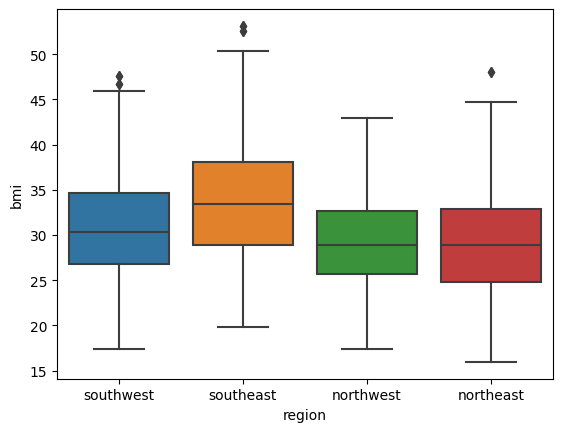

In [23]:
# Q. 왜 남동쪽이 보험료가 더 비살까??
# 가설 : 남동쪽의 bmi 지수 더 높음 => 비만이 다른 지역에 비해 많음!!
bplot = sns.boxplot(y='bmi', x='region', data=insurance)

### 3-3. 연속형

<Axes: xlabel='age', ylabel='Density'>

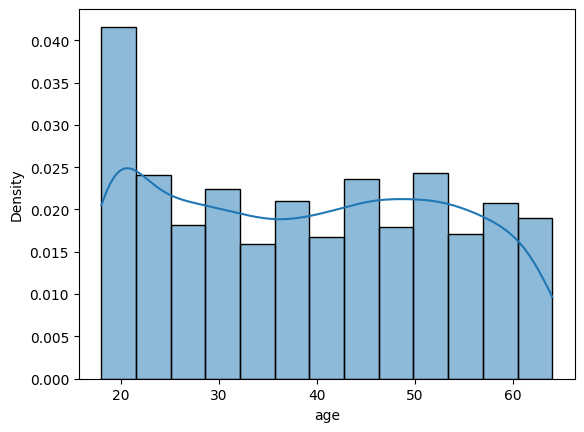

In [24]:
# 20대가 가장 많음
sns.histplot(insurance["age"], kde=True, stat="density")

<Axes: xlabel='bmi', ylabel='Density'>

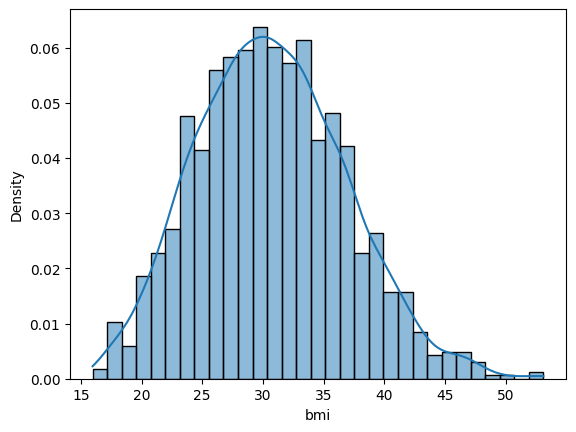

In [25]:
# 정규분포 모형을 띔
sns.histplot(insurance["bmi"], kde=True, stat="density")

<Axes: xlabel='charges', ylabel='Density'>

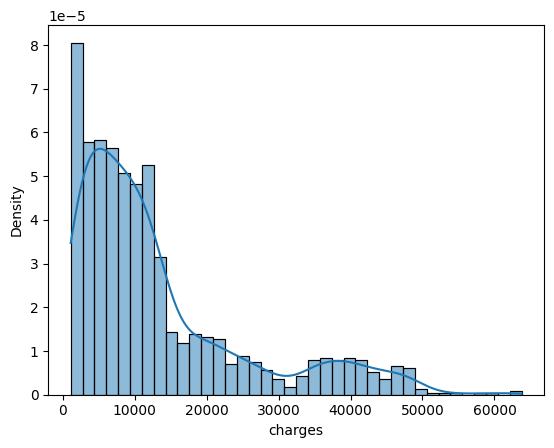

In [26]:
# 종속변수 y : 오른쪽으로 꼬리가 길다 -> log 변환
sns.histplot(insurance["charges"], kde=True, stat="density")

In [27]:
import numpy as np

<Axes: xlabel='charges', ylabel='Density'>

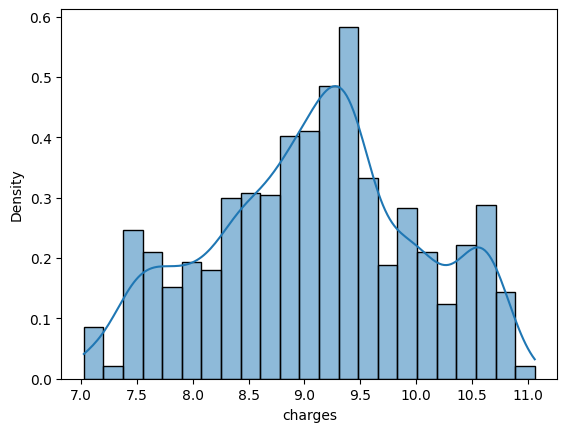

In [28]:
# 종속변수 y : 오른쪽으로 꼬리가 길다 -> log 변환 -> 꼬리가 사라짐
sns.histplot(np.log(insurance["charges"]), kde=True, stat="density")

### 3-4. 연속형 변수와 y와의 관계

In [29]:
corr = insurance.corr(method = 'pearson')
corr

/var/folders/by/whxzj3ld0zz4d056gwdb3r380000gn/T/ipykernel_61345/3283277570.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = insurance.corr(method = 'pearson')


,age,bmi,children,charges
age,1.000000,0.113048,0.037574,0.298624
bmi,0.113048,1.000000,-0.001492,0.199846
children,0.037574,-0.001492,1.000000,0.066442
charges,0.298624,0.199846,0.066442,1.000000


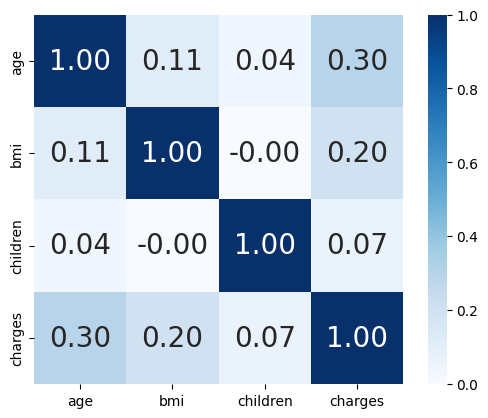

In [30]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')

## 4. 모델링

### 4-1. 선형회귀

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
# get_dummies : 명목형 변수를 자동으로 분류해줌
insurance_data = pd.get_dummies(insurance)

In [33]:
insurance_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [34]:
X= insurance_data[['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']]
y = np.log(insurance_data['charges'])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
lr.score(X_train, y_train)

0.7564856571964136

In [39]:
lr.score(X_test, y_test)

0.787856510103487

In [40]:
y_predict = lr.predict(X_test)

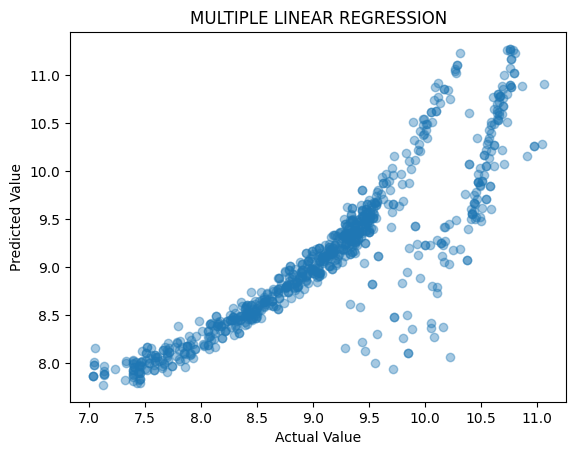

In [41]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show() # 사람들마다 차이가 많이 남!! -> 추가 데이터 필요함

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE

0.4311968135634411

### 4-2. 근접회귀

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
knr = KNeighborsRegressor()

knr.fit(X_train, y_train)

KNeighborsRegressor()

In [46]:
knr.score(X_train, y_train)

0.7267234206905334

In [47]:
knr.score(X_test, y_test)

0.6069058889908919

In [48]:
y_predict = knr.predict(X_test)

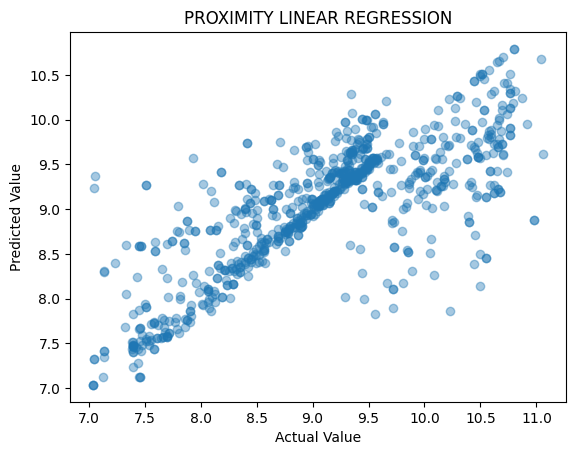

In [49]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("PROXIMITY LINEAR REGRESSION")
plt.show() #엉망진창

In [50]:
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE

0.5869606097040839

### 4-3. 비선형 회귀

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [53]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [54]:
lin_reg.score(X_poly, y_train)

0.8817993088210645

In [55]:
lin_reg.score(X_test_poly, y_test)

0.6848493301940173

In [56]:
y_predict = lin_reg.predict(X_test_poly)

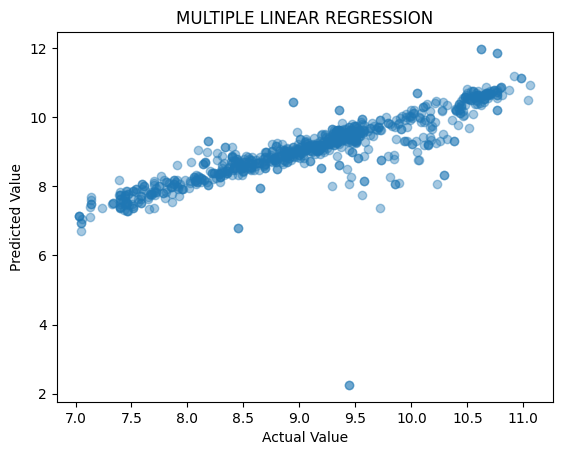

In [57]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show() # 관련성이 높아 보임

In [58]:
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE

0.5255569766344413

### 4-4. RandomForest

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf = RandomForestRegressor()
rf.fit(X=X_train, y=y_train)

RandomForestRegressor()

In [61]:
rf.score(X_train, y_train)

0.9860039605981916

In [62]:
rf.score(X_test, y_test)

0.9351099044166947

In [63]:
y_predict = rf.predict(X = X_test)

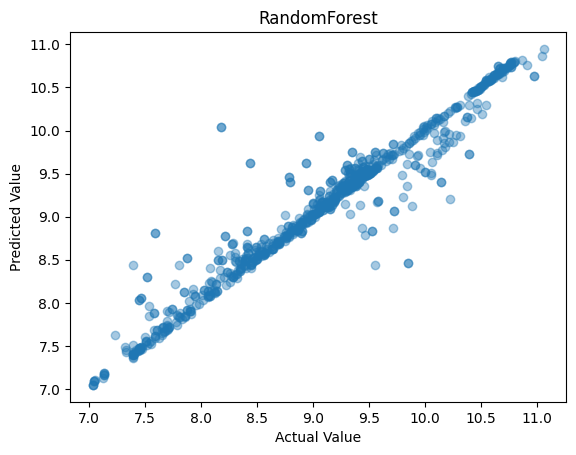

In [64]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("RandomForest")
plt.show() 

In [65]:
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE

0.23847886457413722

### 4-5. SVM

In [66]:
from sklearn.svm import SVR

In [67]:
svr = SVR(kernel='poly', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

SVR(kernel='poly')

In [68]:
svr.score(X_train, y_train)

0.5026692036899469

In [69]:
svr.score(X_test, y_test)

0.5376268605088528

In [70]:
y_predict = svr.predict(X_test)

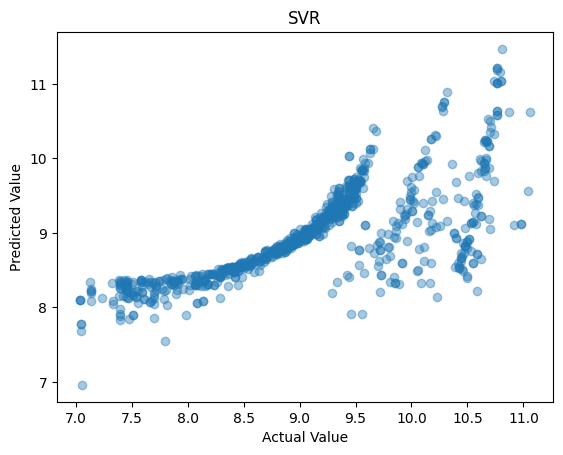

In [71]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("SVR")
plt.show() # 근접회귀 때보다 더 엉망진창

In [72]:
RMSE = mean_squared_error(y_test, y_predict)**0.5
RMSE

0.6365858585749405

### 4-6. 앙상블

In [73]:
from sklearn.ensemble import VotingRegressor

In [74]:
voting_model = VotingRegressor(
    estimators=[('lr',lin_reg),('rf',rf),('svc',svr)], # 3개의 약한 학습기
    n_jobs = 1
)

In [75]:
voting_model.fit(X_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor()),
                            ('svc', SVR(kernel='poly'))],
                n_jobs=1)

In [76]:
voting_model.score(X_train, y_train)

0.8438627694118115

In [77]:
voting_model.score(X_test, y_test)

0.8368936907591178

In [78]:
ens_predict = voting_model.predict(X_test)

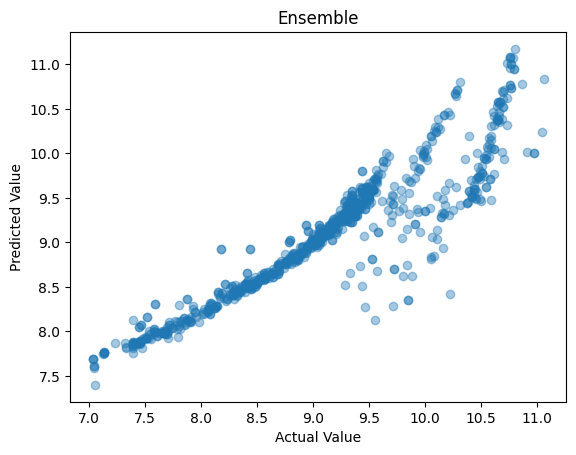

In [79]:
plt.scatter(y_test, ens_predict, alpha=0.4)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Ensemble")
plt.show() 

In [80]:
RMSE = mean_squared_error(y_test, ens_predict)**0.5
RMSE

0.3780907641209262